In [1]:
%pylab inline
from sklearn import datasets, metrics, model_selection, neighbors

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = datasets.load_iris()
X, y = data.data, data.target

#### 使用 train_test_split 把所有样本按 7:3 的比例分为测试样本、训练样本

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

print('#-samples in train, test sets are: ', len(X_train), len(X_test), )

#-samples in train, test sets are:  105 45


#### train_test_split 会把数据的顺序也随机打乱

In [4]:
print(y, '\n', y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 
 [0 1 0 0 0 2 2 2 0 0 0 1 2 1 2 1 2 1 0 1 1 2 2 1 2 1 0 1 0 0 1 2 0 2 1 1 0
 2 2 1 1 2 1 2 0 1 0 2 1 1 1 0 2 0 0 2 1 0 2 2 1 2 2 0 0 2 0 2 1 1 2 0 2 0
 0 0 0 1 1 1 1 0 1 0 0 0 2 0 2 2 1 2 2 0 0 0 1 2 0 2 2 1 1 0 1]


#### 使用 test sample 给模型打分

In [5]:
model = neighbors.KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

print('Accuracy on the train sample: ', metrics.accuracy_score( model.predict(X_train), y_train))
print('Accuracy on the test  sample: ', metrics.accuracy_score( model.predict(X_test), y_test))

Accuracy on the train sample:  0.9809523809523809
Accuracy on the test  sample:  0.9777777777777777


#### k-折交叉检验（k-fold cross-validation），常取  cv = 5， 10

In [6]:
model_selection.cross_validate(model, X,y, cv=5, scoring='accuracy' )

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.0007    , 0.00043464, 0.00026917, 0.00051665, 0.00060582]),
 'score_time': array([0.00139117, 0.00106096, 0.00105977, 0.00097752, 0.00078702]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667])}

In [7]:
model_selection.cross_val_score(model, X, y, cv=5)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [8]:
model_selection.cross_val_score(model, X, y, cv=5).mean()

0.9733333333333334

#### 验证曲线 （validation curve）选择超参数 n_neighbors

In [9]:
model = neighbors.KNeighborsClassifier()

train_scores, test_scores = model_selection.validation_curve(model, X, y,  
                            param_name='n_neighbors', param_range=range(1,31), cv=5)

Text(0, 0.5, 'cv score')

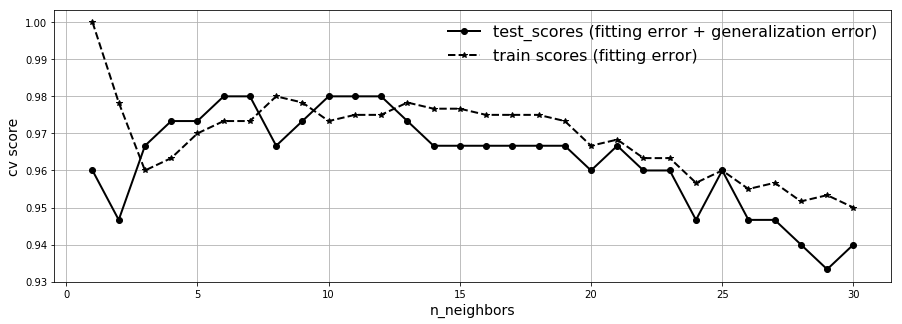

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(range(1,31), [mean(xx) for xx in test_scores], 
        lw=2, marker='o', c='k', label = 'test_scores (fitting error + generalization error)')
ax.plot(range(1,31), [mean(xx) for xx in train_scores], 
        lw=2,  marker='*', c='k', ls = '--', label = 'train scores (fitting error)')
ax.legend(frameon=False, fontsize=16); ax.grid()
ax.set_xlabel('n_neighbors', fontsize=14)
ax.set_ylabel('cv score', fontsize=14)

### 练习题：

####      1. 使用 knn 拟合 digits, 绘制 n_neighbors = 1-31 的 train_score 以及 test_score 的 cross_validation curve. (你将看到 knn 的缓慢速度)

####       2. 学习保存/读入你的模型。
    
    选出你认为最好的 knn 模型，保存到文件。再使用 joblib 读入，对 digits data 进行预测。
    
    提示：相关语句示例为，
        import sklearn.externals.joblib as jb
        jb.dump(model, 'knn_nb3')
        model = jb.load('knn_nb3')

#### 3. 自学神经网络的使用方法。写一个单层神经网络的模型学习 iris 数据。测试神经元个数对 performance 的影响。

    已知多层感知机（Multiple Layers Perception, MLP）分类器的建模语句为
        from sklearn import neural_network
        model = neural_network.MLPClassifier( )
    其中 model 的第一个选项
        hidden_layer_sizes
    代表需要多少层神经网络，每层几个神经元。例如
        hidden_layer_sizes = (10, 15)
    表示有两层神经元，个数分别为 10, 15
    
    问题：
        请用单层 layer 的 nerual network 拟合 iris 数据库；使用 validation_curve 画出 accuracy score 随 hidden_layer_sizes 的变化。看多少个 neuron 可以满足问题需求（达到高准确度的预测结果）

In [11]:


########## 练习题答案在下面，除非你做完了，不要往下翻看
########## 练习题答案在下面，除非你做完了，不要往下翻看
########## 练习题答案在下面，除非你做完了，不要往下翻看
########## 练习题答案在下面，除非你做完了，不要往下翻看
########## 练习题答案在下面，除非你做完了，不要往下翻看





































In [12]:
model = neighbors.KNeighborsClassifier()

digits = datasets.load_digits()
X, y = digits.data, digits.target

train_scores, test_scores = model_selection.validation_curve(model, X, y,  
                            param_name='n_neighbors', param_range=range(1,31), cv=5)

Text(0, 0.5, 'cv score')

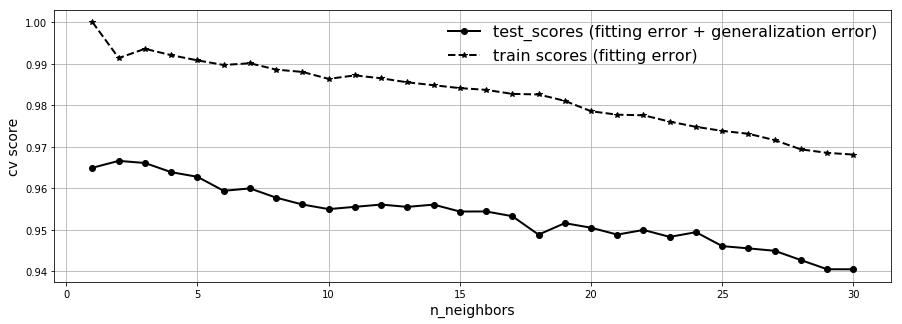

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(range(1,31), [mean(xx) for xx in test_scores], 
        lw=2, marker='o', c='k', label = 'test_scores (fitting error + generalization error)')
ax.plot(range(1,31), [mean(xx) for xx in train_scores], 
        lw=2,  marker='*', c='k', ls = '--', label = 'train scores (fitting error)')
ax.legend(frameon=False, fontsize=16); ax.grid()
ax.set_xlabel('n_neighbors', fontsize=14)
ax.set_ylabel('cv score', fontsize=14)

In [14]:
import sklearn.externals.joblib as jb
model = neighbors.KNeighborsClassifier(n_neighbors=3)
jb.dump(model, 'knn_nb3')
model = jb.load('knn_nb3')
model_selection.cross_val_score(model, X, y, cv=5).mean()

0.9661143537042125

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

Text(0, 0.5, 'accuracy score')

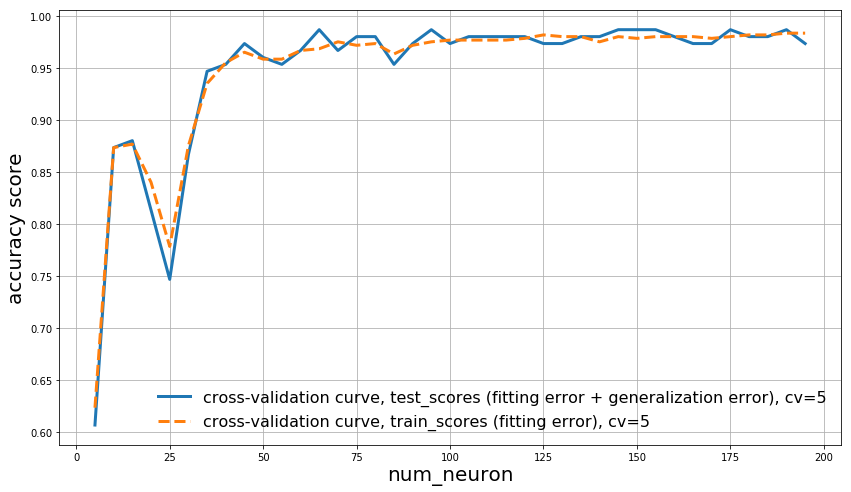

In [15]:
from sklearn import neural_network
nn = neural_network.MLPClassifier( )

num_neurons = par_range = range(5,200,5)
hidden_layer_sizes = [ num_neuron for num_neuron in num_neurons  ]

iris = datasets.load_iris()
train_scores, test_scores = model_selection.validation_curve(nn, iris.data, iris.target, 
                                                             'hidden_layer_sizes', num_neurons, cv=5)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(par_range, [mean(xx) for xx in test_scores], 
        label = 'cross-validation curve, test_scores (fitting error + generalization error), cv=5', lw=3)
ax.plot(par_range, [mean(xx) for xx in train_scores], 
        label = 'cross-validation curve, train_scores (fitting error), cv=5', lw=3, ls = '--')

ax.grid()
ax.legend(fontsize=16, frameon=False)
ax.set_xlabel('num_neuron', fontsize=20)
ax.set_ylabel('accuracy score', fontsize=20)